### Import Data Analysis Libraries

In [ ]:
import pandas as pd
import numpy as np

### Import Visualization Libraries

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE  # Helps visualize higher dimensions data
import missingno as msno # Missing Data visualization
import seaborn as sns
sns.set(style="white")
%matplotlib inline

### Import Sklean (Machine learning framework in Python)

In [ ]:
from sklearn.preprocessing import StandardScaler, normalize  # Helps us in Standardizing the data
from sklearn.metrics import precision_score, f1_score, recall_score, accuracy_score, average_precision_score # Evaluation
                                                                                                             # metrics
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.cluster import KMeans # Clustering
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE # Oversampling

### Miscellaneous

In [90]:
import time
from datetime import datetime
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

### Import data

In [2]:
df = pd.read_csv('train.csv')
df.set_index('ID', inplace = True)

In [3]:
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target
ID,,,,,,,,,,,,,,,,,,,,,
1,0.135370,0.45185,0.31162,2.0469,10.2340,0.16768,0.167630,1.21310,2.25540,0.54815,...,0.078728,0.24695,0.92586,0.18362,9.0895,8.8342,48.172,7.5770,5.7725,0
2,0.005861,0.39858,0.19768,1.9390,9.5771,0.00000,0.007237,1.50890,0.97880,0.60142,...,0.269720,0.00000,0.79303,0.31271,6.2213,4.2785,78.499,4.6497,1.6539,0
3,0.110600,0.16117,0.47894,7.5711,263.9000,0.00000,0.138360,5.20450,0.68447,0.83883,...,0.159870,0.13185,0.80748,0.10234,9.4499,3.3443,38.867,9.3910,1.5272,0
4,0.063911,1.40730,-0.29595,0.5291,-46.2870,-0.71420,0.079071,-0.33076,0.98490,-0.46548,...,-0.015327,-0.13730,1.01530,-1.67320,29.2710,14.1410,73.458,4.9688,4.6785,0
5,0.131680,0.66031,0.44121,2.7098,-23.5960,-0.20007,0.131910,0.51445,2.13570,0.33969,...,0.110170,0.38764,0.93881,1.18420,4.5462,15.1400,44.101,8.2764,7.1014,0


In [4]:
print df.shape
print df['target'].value_counts()

(36553, 65)
0    34788
1     1765
Name: target, dtype: int64


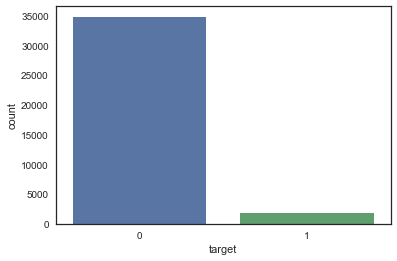

In [5]:
sns.countplot(x='target', data=df)

Sumamry - Data is higly imbalance Data

In [6]:
X_df = df.drop('target', axis = 1)
Y_df = df['target']

### Missing Values Imputation

<Figure size 1152x432 with 0 Axes>

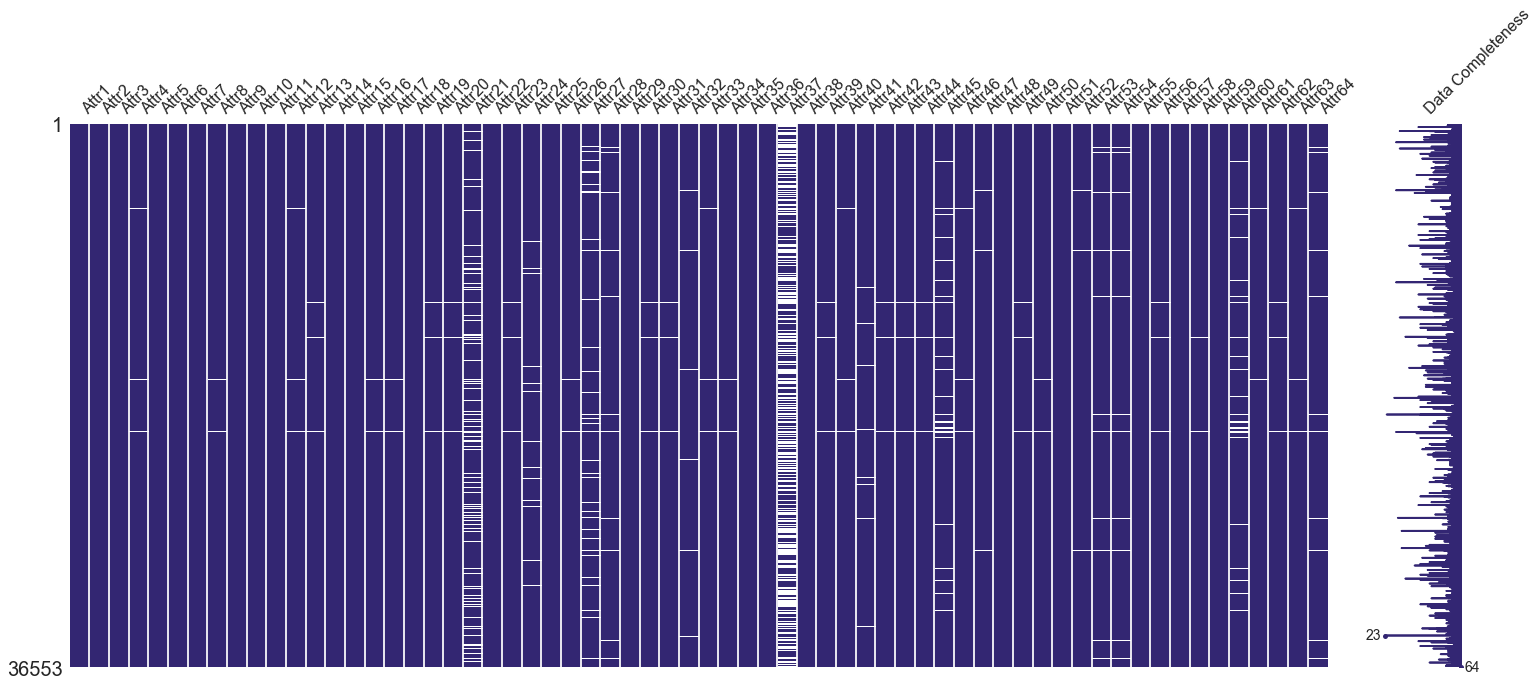

In [7]:
plt.figure(figsize=(16,6))
msno.matrix(X_df,labels = True, color=(0.20,0.15,0.45))

#### Central Imputation

In [8]:
X_df.isnull().sum().sum()

35187L

There are a lot many 0s in the data. Train data seems already standardized or may be the columns are principal components
Lets Impute this 0s along with NA values

In [9]:
X_df = X_df.replace({0:np.nan})

In [10]:
X_df.isnull().sum().sum()

84376L

In [11]:
X_df = X_df.fillna(X_df.median()) # Using Median as Imputation as there are many Outliers

In [12]:
X_df.isnull().sum().sum()

0L

<Figure size 1152x432 with 0 Axes>

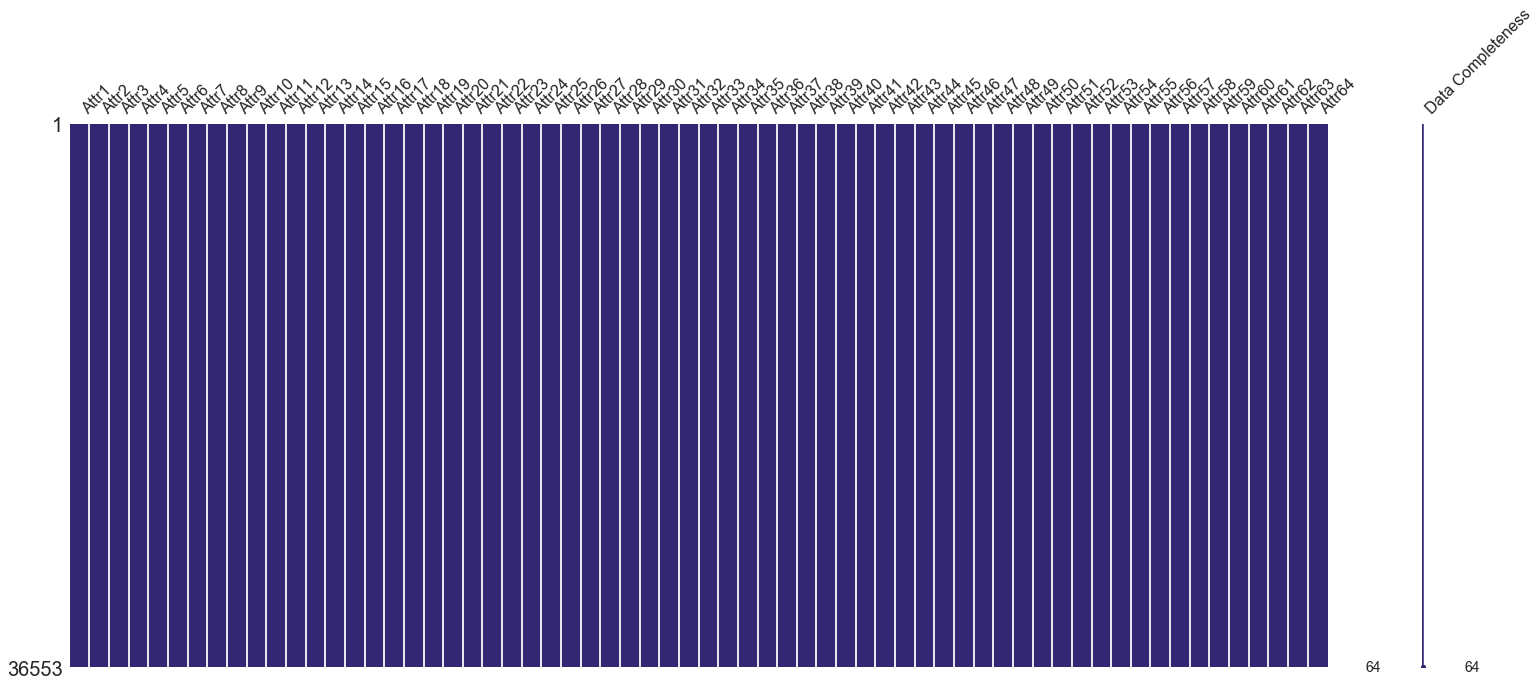

In [13]:
#Recheck missing values after Imputation
plt.figure(figsize=(16,6))
msno.matrix(X_df,labels = True, color=(0.20,0.15,0.45))

### Lets draw heatmap to check multi collinearity

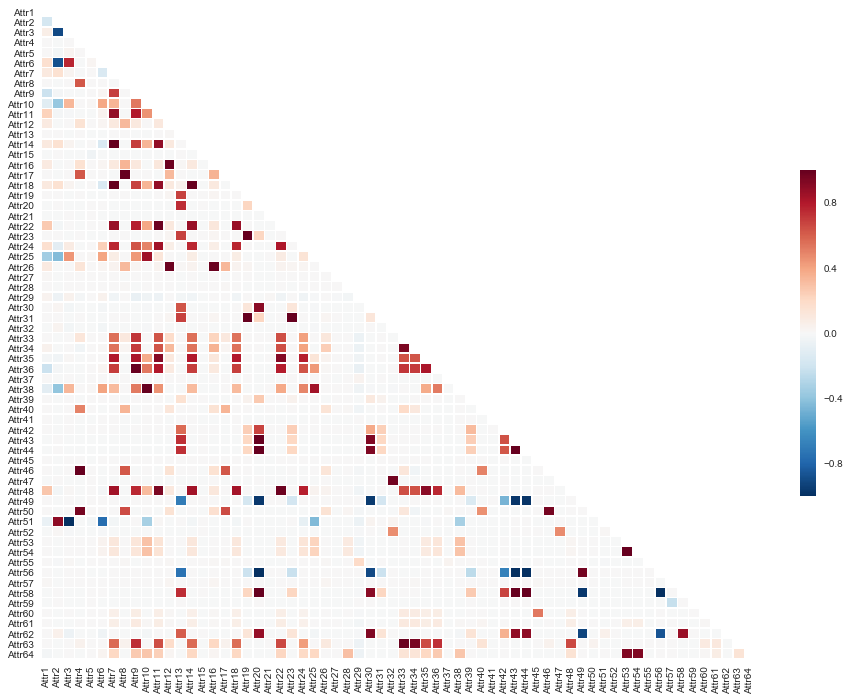

In [14]:
fig, ax = plt.subplots(figsize=(16,12)) 
corr = X_df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

 
sns.heatmap(corr, mask=mask,
            square=False, linewidths=.5, cbar_kws={"shrink": .5})

In [15]:
# A condition to filter all the columns where collinearity with other columns is greater than 0.2 and less than 1.0
high_corr_attr = corr[(corr>0.2) & (corr<1)].count().sort_values(ascending= False)

In [18]:
#There are  31 columns which has correlation of more than 0.2
cols_to_be_dropped = list(high_corr_attr[high_corr_attr > 5].index)

In [19]:
len(cols_to_be_dropped)

31

In [20]:
X_df.drop(cols_to_be_dropped, axis = 1, inplace= True) # Dropping columns

In [21]:
X_df.shape

(36553, 33)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5]),
 <a list of 33 Text xticklabel objects>)

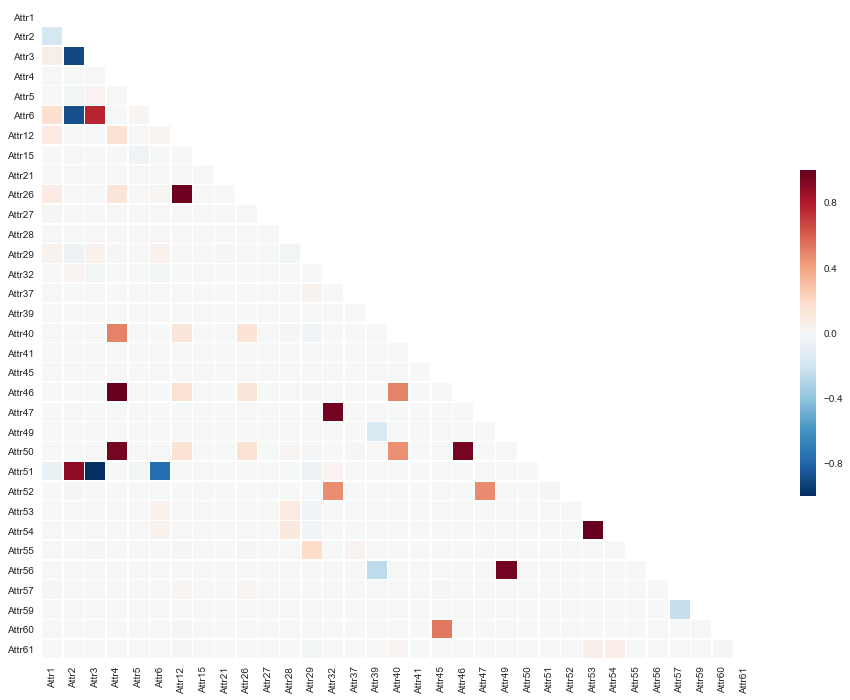

In [22]:
# Lets check the heatmap again
fig, ax = plt.subplots(figsize=(16,12)) 
corr = X_df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

 
sns.heatmap(corr, mask=mask,
            square=False, linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(rotation=90)

In [23]:
X_df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr12,Attr15,Attr21,Attr26,...,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr59,Attr60,Attr61
ID,,,,,,,,,,,,,,,,,,,,,
1,0.135370,0.45185,0.31162,2.0469,10.2340,0.167680,0.56316,819.60,1.04560,0.373930,...,0.297670,0.14326,1.40290,1.66060,1189.700,0.078728,0.24695,0.18362,9.0895,8.8342
2,0.005861,0.39858,0.19768,1.9390,9.5771,0.044573,0.03438,4087.60,0.97850,0.085842,...,0.210510,0.27083,1.01620,1.33400,1.939,0.269720,0.12332,0.31271,6.2213,4.2785
3,0.110600,0.16117,0.47894,7.5711,263.9000,0.044573,1.89830,363.85,1.83520,0.830940,...,0.072886,0.12675,1.87160,2.06320,6092.300,0.159870,0.13185,0.10234,9.4499,3.3443
4,0.063911,1.40730,-0.29595,0.5291,-46.2870,-0.714200,0.12581,5433.40,0.44909,0.056405,...,0.628480,0.19822,-0.69738,0.46946,-13606.000,-0.015327,-0.13730,-1.67320,29.2710,14.1410
5,0.131680,0.66031,0.44121,2.7098,-23.5960,-0.200070,0.51117,675.35,1.06000,0.540110,...,0.258050,0.13579,1.12950,2.46710,75.681,0.110170,0.38764,1.18420,4.5462,15.1400


Their seems a lot of outliers which spans even 50-60 Standard Deviations from the mean. However removing outliers is sometimes not a good idea unless one has Domain expertise

#### Lets try clustering and see if we can get any insigt from that. We shall use Kmeans Clustering 

#### Lets work towards elbow method to determine optimum number of clusters

In [24]:
variance = []
for k in range(1, 20):
    km = KMeans(n_clusters=k)
    km.fit(X_df.values)
    variance.append(km.inertia_)


#### Lets plot Elbow

Text(0.5,1,'Elbow')

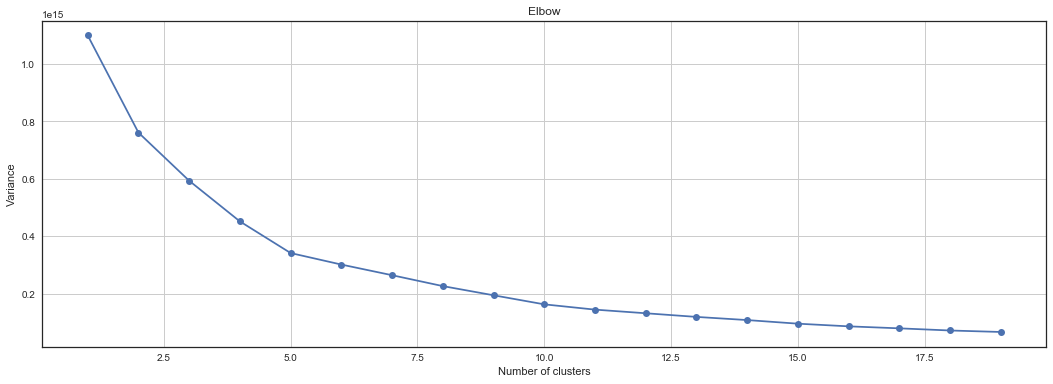

In [25]:
plt.figure(figsize = (18,6))
plt.plot(range(1, 20), variance, marker='o')
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('Variance')
plt.title('Elbow')

Summary- The data is varied with a lot of entities spread over the feature space. 
Maybe 10ish is the Cluster number

So we have data that might belong to more than 2 classes, because at cluster = 2, variance seems a bit off 

Lets move on to Supervised Learning and start building some models

### Train test Split

In [26]:
X = X_df.values
Y = Y_df.values

print X.shape
print Y.shape

(36553L, 33L)
(36553L,)


In [27]:
X_train, X_val, Y_train, Y_val = train_test_split(X,Y, test_size=0.25, random_state=42)

In [29]:
print X_train.shape
print Y_train.shape

(27414L, 33L)
(27414L,)


In [30]:
print X_val.shape
print Y_val.shape

(9139L, 33L)
(9139L,)


### Resampling of data using SMOTE Technique
As we saw earlier this is a high imbalance data. By doing some oversampling we can add new rows to our data with target as minority class (In this case 1)

Data Imbalances happen for a reason. The reason - <b> rare occuring events </b>. Some events have rare occurences but when they do they have huge impact.
Something like cancer, meteor falling on Earth and killing Dinosaurs or Mortgage backed Security crisis of 2008, or something like Bankruptcy. So one has to take care of using an optimal ratio of while smoting. One shouldnot use a high ratio as these occurences are rare. 

In [31]:
# Lets check the imbalance first
print 'The Imbalance is: {}'.format(np.unique(Y_train, return_counts=True)[1][1] / 
                                    (float(np.unique(Y_train, return_counts=True)[1][0]) + 
                                    np.unique(Y_train, return_counts=True)[1][1])*100)

The Imbalance is: 4.89166119501


In [32]:
sm = SMOTE(ratio={1:1965},kind='borderline1',random_state=42) # lets reduce the imbalance 

X_res, Y_res = sm.fit_sample(X_train, Y_train)

In [33]:
print X_res.shape
print Y_res.shape

(28038L, 33L)
(28038L,)


In [34]:
# Lets check the imbalance first
print 'The Imbalance is reduced now and stands at: {}'.format(np.unique(Y_res, return_counts=True)[1][1] / 
                                    (float(np.unique(Y_res, return_counts=True)[1][0]) + 
                                    np.unique(Y_res, return_counts=True)[1][1])*100)

The Imbalance is reduced now and stands at: 7.00834581639


### Lets apply different machine learning models

1. Logistic Regression
2. SVM
3. Random Forests
4. AdaBoost
5. XGBoost

#### Creating Instances

In [35]:
# Lets stick to default Hyperparametrs as of now. We shall tune the best model
log_reg = LogisticRegression(random_state= 42)
svc = SVC(random_state= 42)
rf = RandomForestClassifier(random_state= 42)
ada = AdaBoostClassifier(random_state= 42)
xgb = XGBClassifier(random_state= 42)

A small function that loops through the instances above and stores evaluation metrics of each classifier in a dictionary

In [36]:

def training_predict(trainer, X_train, Y_train, X_test, Y_test):
    scores = {} # Initializing a Dictionary to store evaluation metrics
    
    trainer.fit(X_train, Y_train)  # Training
    Y_pred = trainer.predict(X_test) # Predicts
    
    '''
    Stores the result of trainer in its individual Key
    '''
    scores['Accuracy_test'] = accuracy_score(Y_test , Y_pred)  
    
    scores['Recall_test'] = recall_score(Y_test , Y_pred)
    
    scores['Precision_test'] = precision_score(Y_test , Y_pred)
    
    scores['F1_Score_test'] = f1_score(Y_test , Y_pred)
    
    
    return scores


In [37]:
print X_res.shape
print Y_res.shape
print '\n'
print X_val.shape
print Y_val.shape

(28038L, 33L)
(28038L,)


(9139L, 33L)
(9139L,)


In [39]:
# __class__.__name__ is a nice attribute to get the Algorithm Name
# log_reg.__class__.__name__
# Output = 'LogisticRegression'

In [40]:
# Ignore the error
predictors = {} # Initializing a dictionary to store training and testing data
for model in [log_reg, svc, rf, ada, xgb]: # these are our objects that we instantiated above. We loop through them
    model_name = model.__class__.__name__
    predictors[model_name]  = {}
    predictors[model_name] =  training_predict(model, X_res, Y_res, X_val, Y_val) #Scores that is returned from trainer goes to
                                                                             # the respective predictor
    

C:\Users\Python\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [42]:
pd.DataFrame(predictors).T

,Accuracy_test,F1_Score_test,Precision_test,Recall_test
AdaBoostClassifier,0.954481,0.257143,0.529412,0.169811
LogisticRegression,0.947916,0.008333,0.035714,0.004717
RandomForestClassifier,0.957982,0.286245,0.675439,0.181604
SVC,0.950651,0.000000,0.000000,0.000000
XGBClassifier,0.961812,0.350093,0.831858,0.221698


The above scores are on the base of Smoting at 7% from 4.8% for minoirty class

However we can try different ratios in Smote and try models on different samples.

Lets try some values in Smote and run the iterations again

In [43]:
smote_values = np.linspace(0.065, 0.125, num= 15)
smote_values

array([0.065     , 0.06928571, 0.07357143, 0.07785714, 0.08214286,
       0.08642857, 0.09071429, 0.095     , 0.09928571, 0.10357143,
       0.10785714, 0.11214286, 0.11642857, 0.12071429, 0.125     ])

In [91]:
#Ignore the errors
start = time.time()

panel = {} # Saves key as smoting ratio and dictionary is the result of each classifier

for value in smote_values:
    sm = SMOTE(ratio=value,kind='borderline1',random_state=42)
    X_res, Y_res = sm.fit_sample(X_train, Y_train)

    print 'Loop for smote value {} started at {}'.format(value, datetime.now().strftime("%H:%M:%S"))
   
    predictors = {} # Initializing a dictionary to store training and testing data
 
    for model in [log_reg, svc, rf, ada, xgb]:
        model_name = model.__class__.__name__
        predictors[model_name]  = {}
        predictors[model_name] =  training_predict(model, X_res, Y_res, X_val, Y_val) #Scores that is returned from trainer goes to
    
    panel[value] = predictors  # the respective predictor
            
    print 'Loop Ended at {}'.format(datetime.now().strftime("%H:%M:%S"))
    print '\n'
    
print 'Loop took {} mins'.format((time.time() - start) / 60)

C:\Users\Python\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


Loop for smote value 0.065 started at 23:31:46


C:\Users\Python\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Python\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


Loop Ended at 23:39:08


Loop for smote value 0.0692857142857 started at 23:39:09


C:\Users\Python\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Python\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


Loop Ended at 23:47:28


Loop for smote value 0.0735714285714 started at 23:47:29


C:\Users\Python\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Python\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


Loop Ended at 23:56:15


Loop for smote value 0.0778571428571 started at 23:56:16


C:\Users\Python\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Python\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


Loop Ended at 00:04:49


Loop for smote value 0.0821428571429 started at 00:04:50


C:\Users\Python\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Python\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


Loop Ended at 00:11:22


Loop for smote value 0.0864285714286 started at 00:11:23


C:\Users\Python\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Python\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


Loop Ended at 00:22:06


Loop for smote value 0.0907142857143 started at 00:22:07


C:\Users\Python\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Python\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


Loop Ended at 00:33:33


Loop for smote value 0.095 started at 00:33:34


C:\Users\Python\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Python\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


Loop Ended at 00:44:55


Loop for smote value 0.0992857142857 started at 00:44:55


C:\Users\Python\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Python\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


Loop Ended at 00:53:25


Loop for smote value 0.103571428571 started at 00:53:26


C:\Users\Python\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Python\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


Loop Ended at 01:02:29


Loop for smote value 0.107857142857 started at 01:02:30


C:\Users\Python\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Python\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


Loop Ended at 01:11:30


Loop for smote value 0.112142857143 started at 01:11:30


C:\Users\Python\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Python\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


Loop Ended at 01:20:26


Loop for smote value 0.116428571429 started at 01:20:27


C:\Users\Python\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Python\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


Loop Ended at 01:29:59


Loop for smote value 0.120714285714 started at 01:30:00


C:\Users\Python\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Python\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


Loop Ended at 01:38:39


Loop for smote value 0.125 started at 01:38:40
Loop Ended at 01:46:40


Loop took 134.906983332 mins


C:\Users\Python\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [96]:
smote_iterated_df = pd.DataFrame()
for key in panel:
    temp_df = pd.DataFrame(panel[key]).T
    temp_df['Smote'] = key
    temp_df.index.name = 'Class'
    temp_df.reset_index(inplace= True)
    temp_df.set_index(['Smote','Class'], inplace= True)
    smote_iterated_df = smote_iterated_df.append(temp_df)

In [150]:
smote_iterated_df.head(15)

Accuracy_test  F1_Score_test  Precision_test  \
Smote    Class                                                                  
0.107857 AdaBoostClassifier           0.948572       0.279141        0.399123   
         LogisticRegression           0.949557       0.017058        0.088889   
         RandomForestClassifier       0.957216       0.290381        0.629921   
         SVC                          0.950432       0.000000        0.000000   
         XGBClassifier                0.962687       0.404887        0.778523   
0.125000 AdaBoostClassifier           0.943539       0.279330        0.342466   
         LogisticRegression           0.948572       0.016736        0.074074   
         RandomForestClassifier       0.955575       0.297578        0.558442   
         SVC                          0.950213       0.000000        0.000000   
         XGBClassifier                0.961046       0.400673        0.700000   
0.065000 AdaBoostClassifier           0.953934       0.213084        0.513514   
         LogisticRegression           0.946384       0.016064        0.054054   
         RandomForestClassifier       0.958311       0.265896        0.726316   
         SVC                          0.950870       0.000000        0.000000   
         XGBClassifier                0.961484       0.333333        0.846154   

                                 Recall_test  
Smote    Class                                
0.107857 AdaBoostClassifier         0.214623  
         LogisticRegression         0.009434  
         RandomForestClassifier     0.188679  
         SVC                        0.000000  
         XGBClassifier              0.273585  
0.125000 AdaBoostClassifier         0.235849  
         LogisticRegression         0.009434  
         RandomForestClassifier     0.202830  
         SVC                        0.000000  
         XGBClassifier              0.280660  
0.065000 AdaBoostClassifier         0.134434  
         LogisticRegression         0.009434  
         RandomForestClassifier     0.162736  
         SVC                        0.000000  
         XGBClassifier              0.207547

Recall Score is what we are interested in. Recall shows our model's ability to predict Positive as Positive. Since our Data is highly imbalance, it is difficult for any model to get a better recall. Sometime models ignores the minority class


In [153]:
# Lets rearrange Recall_test score in descending order
smote_iterated_df['Recall_test'].sort_values(ascending = False).head(5)

Smote     Class        
0.112143  XGBClassifier    0.294811
0.120714  XGBClassifier    0.283019
0.125000  XGBClassifier    0.280660
0.107857  XGBClassifier    0.273585
0.116429  XGBClassifier    0.268868
Name: Recall_test, dtype: float64

In [103]:
smote_iterated_df['Recall_test'].idxmax() # Finding the Smote_Ratio and Class for the largest Recall Score

(0.11214285714285716, 'XGBClassifier')

In [ ]:
smote_iterated_df.to_csv('Smote_iteration.csv', sep=',')

Summary - 
1. XgBoost is a clear Winner
2. At a smote ratio of 0.11214, Recall was highest

#### So we will move forward with XGboost and smote ratio of 0.11214 and hyper paramenter tuning

### PreTune and Post Tune

In [105]:
# Ignore Error
sm = SMOTE(ratio=0.11214,kind='borderline1',random_state=42)
X_res, Y_res = sm.fit_sample(X_train, Y_train)

print X_res.shape
print Y_res.shape
print '\n'
print X_val.shape
print Y_val.shape

C:\Users\Python\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


(28996L, 33L)
(28996L,)


(9139L, 33L)
(9139L,)


### PreTune with default parameters

In [106]:
clf_pre_tune = XGBClassifier(max_depth= 3 , n_estimators= 100, min_child_weight= 1, reg_lambda= 1) # Default Paramters

In [108]:
# Ignore error
clf_pre_tune.fit(X_res, Y_res)
Y_pred = clf_pre_tune.predict(X_val)

print 'F1 Accuracy : {}'.format(f1_score(Y_val,Y_pred))
print 'Precision Score: {}'.format(precision_score(Y_val,Y_pred))
print 'Recall Score: {}'.format(recall_score(Y_val,Y_pred))

F1 Accuracy : 0.418760469012
Precision Score: 0.722543352601
Recall Score: 0.294811320755


C:\Users\Python\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### Tuning

In [109]:
clf_tune = XGBClassifier(n_estimators= 300, n_jobs= -1)
parameters = {'max_depth': range(5),
              'min_child_weight':[1,2,3,4,5], 
              'reg_lambda': [0.50,0.75,1,1.25,1.5]} 

In [110]:
grid = GridSearchCV(clf_tune, param_grid = parameters, n_jobs= -1, cv = 5 )

In [111]:
grid.fit(X_res, Y_res)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'reg_lambda': [0.5, 0.75, 1, 1.25, 1.5], 'max_depth': [0, 1, 2, 3, 4], 'min_child_weight': [1, 2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [112]:
print 'Best parameters: {}'.format(grid.best_params_)

Best parameters: {'reg_lambda': 0.5, 'max_depth': 4, 'min_child_weight': 3}


In [113]:
# Ignore error
Y_pred_grid = grid.predict(X_val)

C:\Users\Python\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [114]:
f1_score(Y_val, Y_pred_grid)

0.6005917159763313

### PostTune

In [119]:
# Optimal Parameters
MAX_DEPTH = grid.best_params_['max_depth']
MIN_CHILD_WEIGHT = grid.best_params_['min_child_weight']
REG_LAMDBA = grid.best_params_['reg_lambda']

In [121]:
clf_post_tune = XGBClassifier(max_depth= MAX_DEPTH , n_estimators= 500, 
                              min_child_weight= MIN_CHILD_WEIGHT, reg_lambda= REG_LAMDBA)

In [122]:
# Ignore error
clf_post_tune.fit(X_res, Y_res)
Y_pred = clf_post_tune.predict(X_val)

print 'Post_tune F1 Accuracy : {}'.format(f1_score(Y_val,Y_pred))
print 'Post_tune Precision Score: {}'.format(precision_score(Y_val,Y_pred))
print 'Post_tune Recall Score: {}'.format(recall_score(Y_val,Y_pred))

Post_tune F1 Accuracy : 0.62962962963
Post_tune Precision Score: 0.794964028777
Post_tune Recall Score: 0.521226415094


C:\Users\Python\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### Great! Almost there

In [115]:
# Lets test on the real test data which we have held out for this moment

In [123]:
X_test_df = pd.read_csv('test.csv')
X_test_df.set_index('ID', inplace = True)
X_test_df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
ID,,,,,,,,,,,,,,,,,,,,,
36554,0.200550,0.37951,0.396410,2.04720,32.351,0.388250,0.249760,1.330500,1.13890,0.504940,...,348690.0000,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277
36555,0.009020,0.63202,0.053735,1.12630,-37.842,0.000000,0.014434,0.582230,1.33320,0.367980,...,1.1263,0.180110,0.024512,0.84165,0.340940,9.9665,4.2382,116.500,3.1330,2.5603
36556,0.124080,0.83837,0.142040,1.16940,-91.883,0.000000,0.153280,0.192790,2.11560,0.161630,...,989.4100,0.079665,0.767680,0.92847,0.000000,3.3192,6.4994,144.630,2.5236,107.6700
36557,0.203930,0.56037,0.134950,1.24080,3.158,0.000000,0.242910,0.784520,2.27060,0.439630,...,711.8500,0.107700,0.463860,0.89419,0.000000,24.9790,10.7670,90.080,4.0519,7.4525
36558,-0.054623,0.92857,-0.026927,0.94263,-87.724,-0.054623,-0.054623,0.074796,0.92301,0.069453,...,-1693.2000,-0.083417,-0.786480,1.08340,6.611400,4.7055,3.1662,226.760,1.6096,1.3551


<Figure size 1152x432 with 0 Axes>

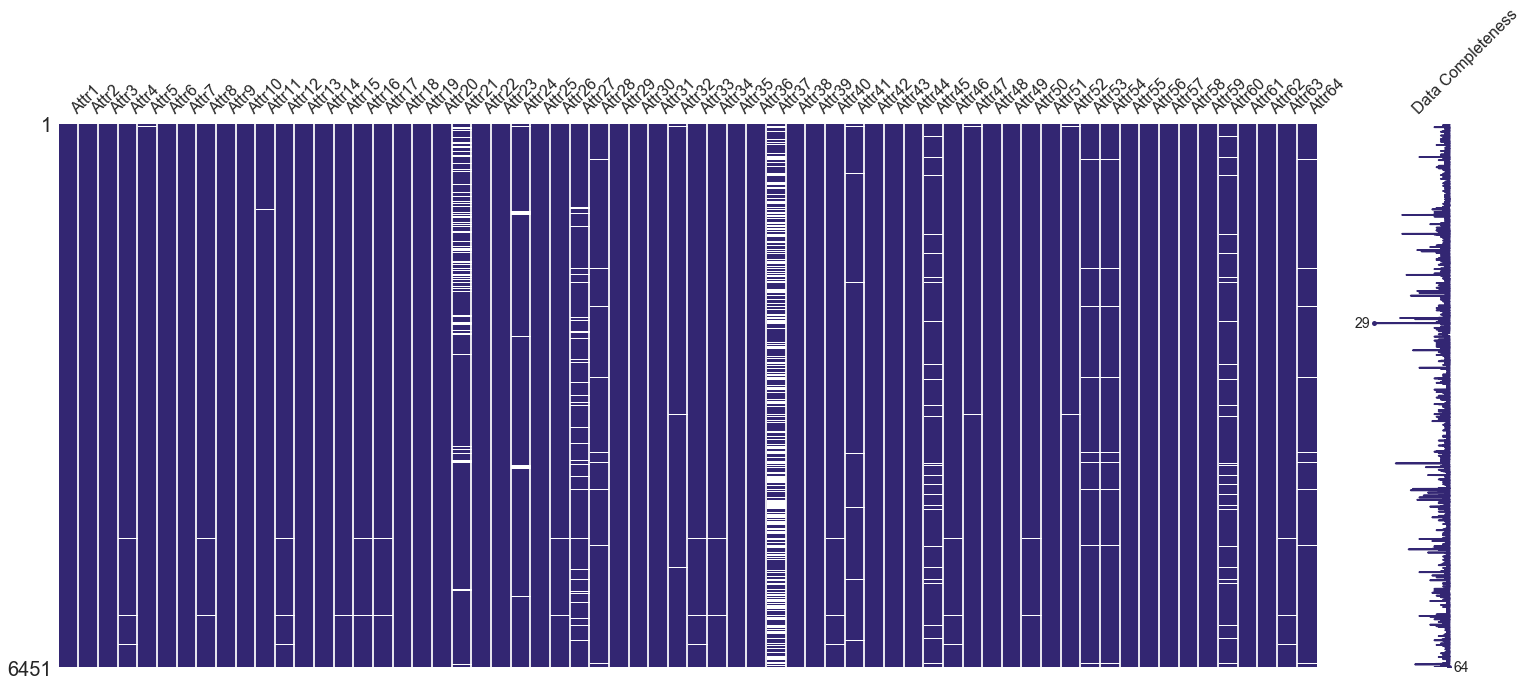

In [124]:
# Plotting NA values
plt.figure(figsize=(16,6))
msno.matrix(X_test_df, labels = True, color=(0.20,0.15,0.45))

#### Imputation

In [125]:
X_test_df.isnull().sum().sum() #Checking total number of missing values

5850L

In [126]:
X_test_df = X_test_df.replace({0:np.nan}) #Replacing 0 with NA values

In [127]:
X_test_df.isnull().sum().sum() # This shows previous missing values and the new Zeros added

14350L

In [128]:
X_test_df = X_test_df.fillna(X_df.median()) # Imputing Null values with train set Median

In [129]:
X_test_df.isnull().sum().sum()

2391L

In [131]:
# The values that are null are in the columns which we are going to drop to match the number dimensions 
# of the training set

<Figure size 1152x432 with 0 Axes>

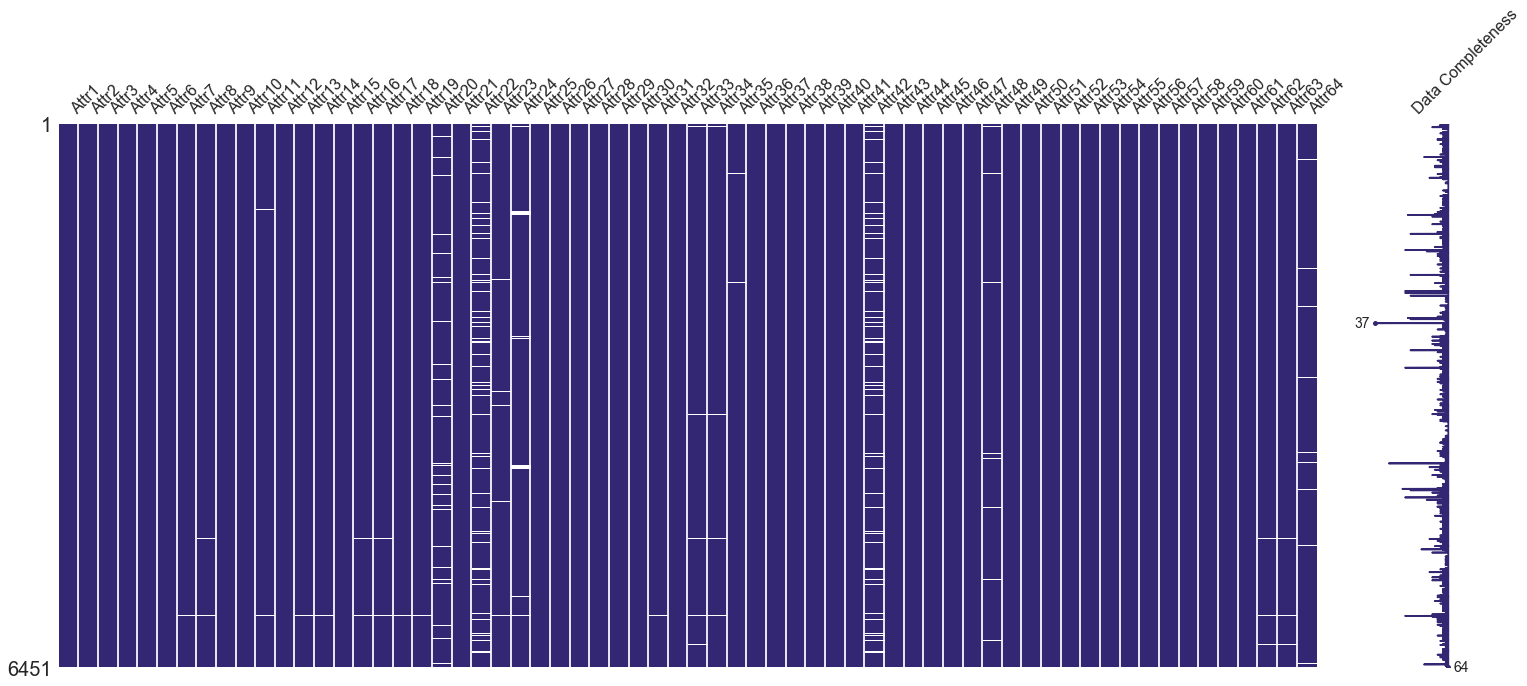

In [132]:
#Rechecking missing values after Imputation
plt.figure(figsize=(16,6))
msno.matrix(X_test_df, labels = True, color=(0.20,0.15,0.45))

#### Dropping columns to bring test data in same dimension to train model. We will use the same cols_to_be_dropped list which has irrelevant columns

In [134]:
print cols_to_be_dropped

['Attr38', 'Attr10', 'Attr9', 'Attr24', 'Attr22', 'Attr11', 'Attr36', 'Attr35', 'Attr48', 'Attr64', 'Attr14', 'Attr34', 'Attr7', 'Attr18', 'Attr33', 'Attr63', 'Attr42', 'Attr20', 'Attr44', 'Attr43', 'Attr58', 'Attr13', 'Attr25', 'Attr17', 'Attr19', 'Attr31', 'Attr8', 'Attr23', 'Attr30', 'Attr16', 'Attr62']


In [135]:
X_test_df.drop(cols_to_be_dropped, axis = 1 , inplace = True)

In [136]:
# Rechecking the NA values
X_test_df.isnull().sum().sum()

0L

In [137]:
X_test = X_test_df.values

In [138]:
print X_test.shape

(6451L, 33L)


In [139]:
# Our test data ready to be tested

In [140]:
# Ignore error
Y_test_pred = clf_post_tune.predict(X_test)

C:\Users\Python\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


#### Writing result to CSV file

In [143]:
test_result = pd.DataFrame(Y_test_pred, index = X_test_df.index, columns = ['prediction'])

In [146]:
test_result.to_csv('test_Result_XGB.csv', sep=',')

In [148]:
# f1 accuracy on test set was 64.71%
# Precision Score was 85.94%
# Recall Score was 51.89%